<a href="https://colab.research.google.com/github/NimrodDev/TensorFlow/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
# Here we import the necessary libraries, which are Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# We need some helper libraries so we import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# We load the data
fashion_mnist = keras.datasets.fashion_mnist # Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #Here we spilt into training and testing


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Just a good look of what is working with
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23] # Lets have a look at one pixel

194

In [5]:
train_labels[:10] # Here we look at the first training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
# Here we create an array of label list to know which is which
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

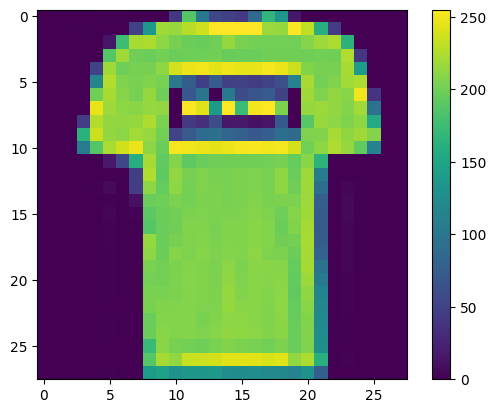

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Here we preprocess our data,reprocess our data by scaling the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Here we build our model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), # This is our input layer(1)
    keras.layers.Dense(128, activation = 'relu'), # This is our hidden layer(2)
    keras.layers.Dense(10, activation = 'softmax') # This is our output layer(3)
])

In [10]:
# We compile the model
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
# Here we train the model
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5022 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3787 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3362 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3146 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2967 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2813 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2595 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2479 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

In [12]:
# Here we evalute the model by test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8853
Test accuracy: 0.8852999806404114


313/313 [==============================] - 1s 2ms/step
Trouser


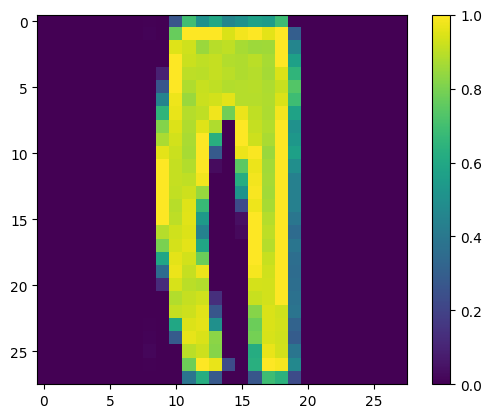

In [13]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])

plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number:6
1/1 [==============================] - 0s 30ms/step


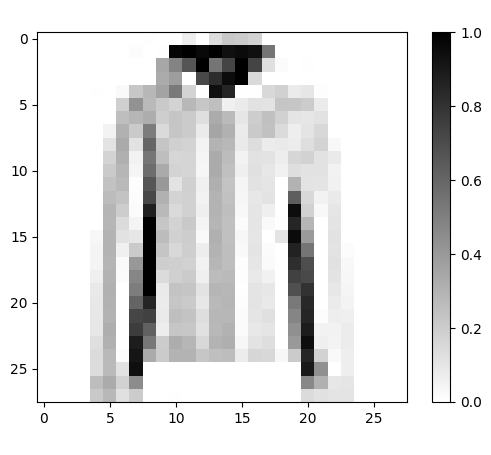

In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  predictions = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(predictions)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap = plt.cm.binary)
  plt.title('Expected:' + label)
  plt.xlabel('Guess:' + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number:")
    if num.isdigit():
      num = int(num)
      if 0 <= num <=1000:
        return int(num)
      else:
          print("Try again........")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)